<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Bernstein-Vazirani

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_1021/3406932148.py:17: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


#### EJERCICIO

Crea las siguientes funciones auxiliares:

- __count_to_digital_values__: una funcion que tome el resultado de cuentas del histograma de salida de una ejecucion de una funcion binaria de n a 1 qubit cuantica y los imprima en el siguiente formato:
```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```
- __get_probabilities__: que tome como entrada un vector de estados y devuelva las probabilidades de todos sus componentes
- __get__phases__: que tome como entrada un vector de estados y devuelva las fases de todos sus componentes


In [2]:
def count_to_digital_values(counts):
    print("INPUT------OUTPUT-----count----percent")
    for ind in counts.items():
        print(f"{ind[0][1:]} ------ {ind[0][0]} ------ {ind[1]} ------ {ind[1]/1024}")


def get_probabilities(svector):
    return svector.get_statevector()

    
def get_phases(svector):
    return svector.get_phases()

# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que codifique el producto interno binario con una cadena dada $s$:

$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1$$

$$f_s(x) = s \cdot x \mod 2$$

## Oráculo para una cadena binaria dada

#### EJERCICIO

Dada una cadena $s$ de n bits, construye un circuito con n qubits de entrada y 1 qubit de salida, que compute el resultado de la funcion del oráculo de Berstein-Vazirani para una funcion caracterizada por esta cadena.

Ejecuta el circuito y construye el histograma de resultados

s 011


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


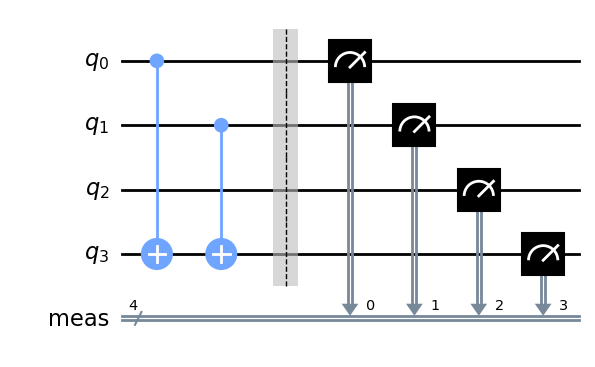

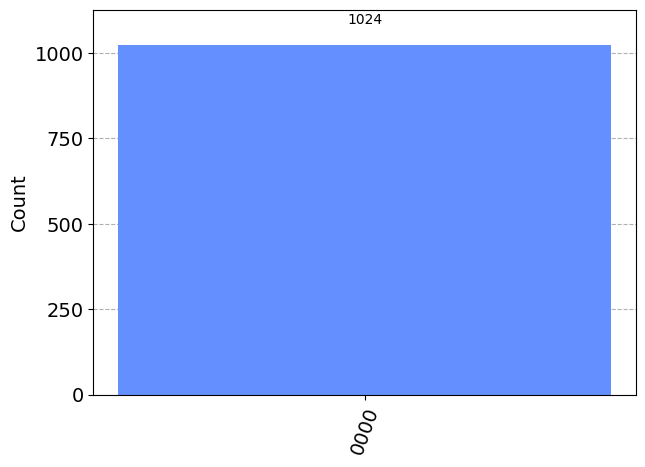

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # s2s1s0 the hidden binary string
print('s', s)

#creamos el circuito
oracle_qc = QuantumCircuit(n+1)

# Apply the inner-product oracle
num = 0
for ind in s[::-1]:
    if ind=='1':
        oracle_qc.cx(num,n)
    num += 1

#ponemos las puertas de medida
oracle_qc.measure_all()

#lo dibujamos
display(oracle_qc.draw("mpl"))

#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=oracle_qc,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())

Si ponemos los n __qubits del input__ en superposicion vemos que es la funcion que realiza la operacion que hemos definado. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 129 ----- 0.1259765625
001 ------ 1 ----- 131 ----- 0.1279296875
010 ------ 1 ----- 107 ----- 0.1044921875
011 ------ 0 ----- 122 ----- 0.119140625
100 ------ 0 ----- 127 ----- 0.1240234375
101 ------ 1 ----- 122 ----- 0.119140625
110 ------ 1 ----- 150 ----- 0.146484375
111 ------ 0 ----- 136 ----- 0.1328125
shots totales 1024
```



s 011


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


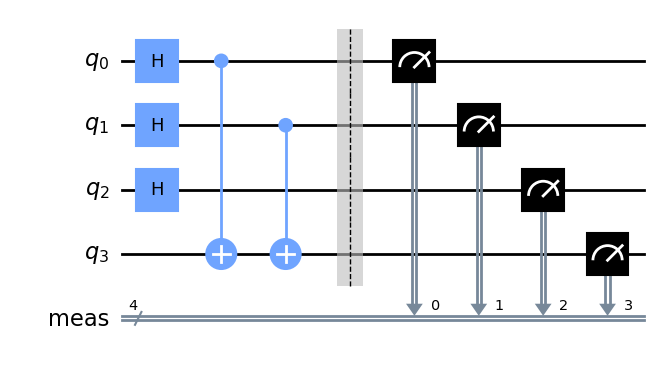

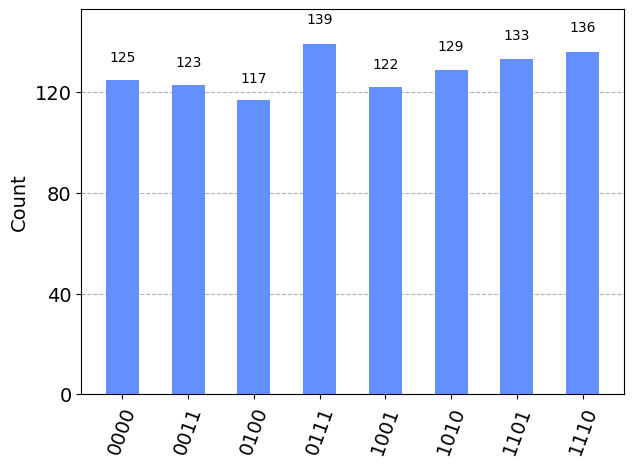

In [4]:
n=3
s = '011'   # s2s1s0 the hidden binary string
print('s',s)

#creamos el circuito
oracle_qc = QuantumCircuit(n+1)

#ejecucion todas las entradas posibles de input en paralelo
oracle_qc.h(range(n))

# Apply the inner-product oracle
num = 0
for ind in s[::-1]:
    if ind=='1':
        oracle_qc.cx(num,n)
    num += 1

#ponemos las puertas de medida
oracle_qc.measure_all()

#lo dibujamos
display(oracle_qc.draw("mpl"))

#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=oracle_qc,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())

## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo

### EJERCICIO

Crea una funcion de oráculo de n qubits que genere una cadena binaria aleatoria s y devuelva un circuito que computa la funcion $s.xmod(2)$ que viene caracterizada por ella 

In [5]:
#crea una cadena aleatoria s de longitud n bits
def random_bin_str(n):
    return format(np.random.randint(2**n),f'0{n}b')

s = random_bin_str(5)
print(s)

10010


In [6]:
### HACER LA FUNCION

def bv_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(n+1)

    #crea una cadena aleatoria s de longitud n bits
    s = random_bin_str(n)
    print('Creado BV-oraculo con s',s)
    
    #Crea el oraculo
    num = 0
    for ind in s[::-1]:
        if ind=='1':
            oracle_qc.cx(num,n)
        num += 1

    oracle_qc.name = 'BV-Oracle' #to show in the display circuit
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

Creado BV-oraculo con s 100


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


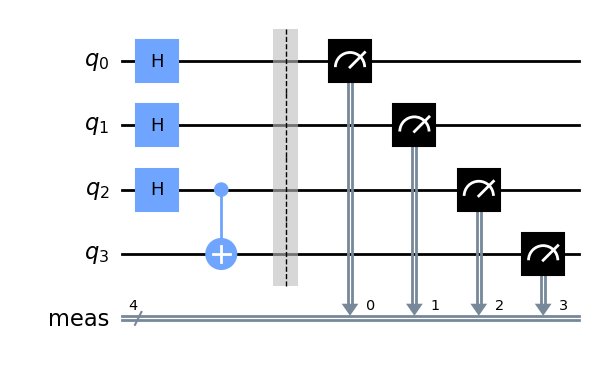

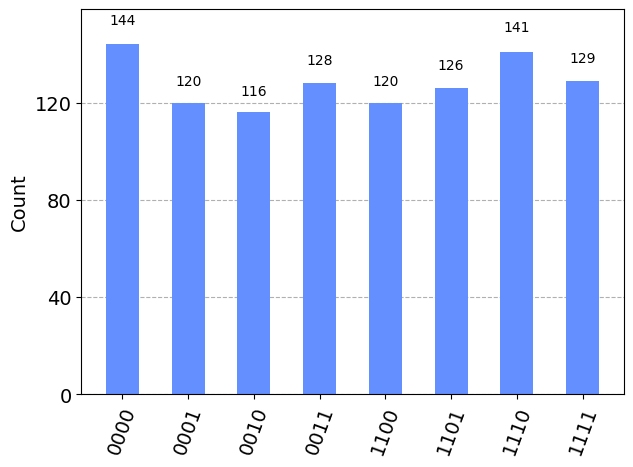

INPUT------OUTPUT-----count----percent
100 ------ 1 ------ 120 ------ 0.1171875
011 ------ 0 ------ 128 ------ 0.125
101 ------ 1 ------ 126 ------ 0.123046875
001 ------ 0 ------ 120 ------ 0.1171875
111 ------ 1 ------ 129 ------ 0.1259765625
110 ------ 1 ------ 141 ------ 0.1376953125
010 ------ 0 ------ 116 ------ 0.11328125
000 ------ 0 ------ 144 ------ 0.140625


In [7]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1)

#ponemos los qubits de entrada en superposicion
circuit.h(range(n))

# Le añadimos el oráculo con funcion aleatoria -> Utilizar el metodo.compose de la clase QuantumCircuit -> recordar el parametro inplace del metodo
circuit.compose(bv_oracle(n),inplace=True)

#ponemos las puertas de medida
circuit.measure_all()

#Mostramos el circuito
display(circuit.draw("mpl"))

backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))

#mostramos la ejecucion de la funcion en binario
count_to_digital_values(job.get_counts())

# Ejecucion del Algoritmo de Berstein-Vazirani

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector y la visualizacion de plot_bloch_multivector

In [8]:
def svector_viz(qc):
    #tomamos un circuito sin medidas
    #medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    qc.save_statevector(label="Phi")
    
    #ejecutamos en el simulador
    simulador = Aer.get_backend("aer_simulator")
    tcirc = transpile(qc,simulador)
    job = simulador.run(tcirc).result()

    #obtenemos el vector de estados resultado
    data = job.data(0)
    stv = data["Phi"]
    
    #imprimimos el vector en latex
    display(stv.draw("latex"))
    
    #imprimimos las probabilidades de cada estado de la base
    print(get_probabilities(stv))
    
    #imprimimos las pases de cada estado de la base
    print(get_phases(stv))
    
    #visualizamos el plot_bloch_multivector
    display(plot_bloch_multivector(stv))

Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

Creado BV-oraculo con s 000


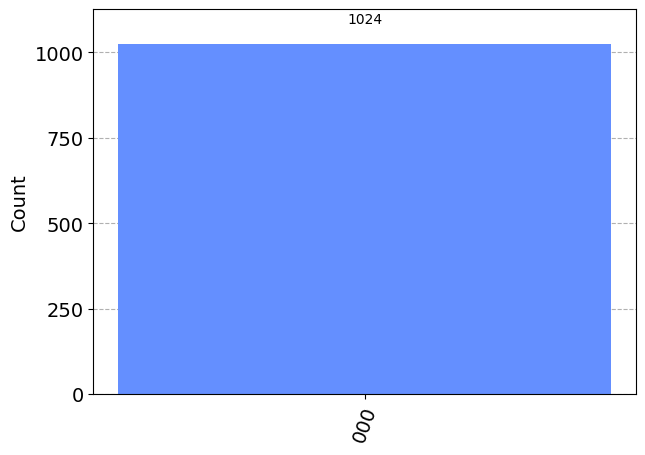

In [9]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1,n)

#PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)

#descomentar para mostrar el circuito y vector de estados en este paso
#display(circuit.draw())
#svector_viz(circuit)

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit.compose(bv_oracle(n),inplace=True)

#PASO 3 - Le añadimos las puertas Hadamard
circuit.h(range(n))

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure(range(n),range(n))

#PASO 5- Medimos resultados finales
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))

# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Bersntein-Vazirani, para ello:

- Creamos el circuito cuántico, que llamamos <b>bv_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

Creado BV-oraculo con s 011


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


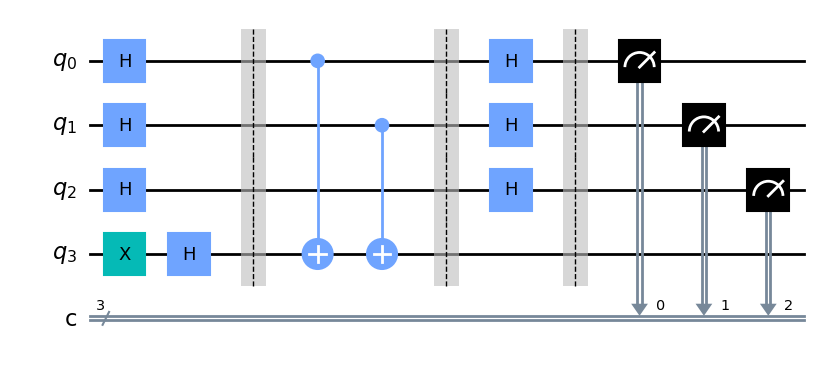

In [10]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1,n)

#PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

#descomentar para mostrar el circuito y vector de estados en este paso
#display(circuit.draw())
#svector_viz(circuit)

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit.compose(bv_oracle(n),inplace=True)

#PASO 3 - Le añadimos las puertas Hadamard
circuit.barrier()
circuit.h(range(n))
circuit.barrier()

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure(range(n),range(n))

#Mostramos el circuito
display(circuit.draw("mpl"))

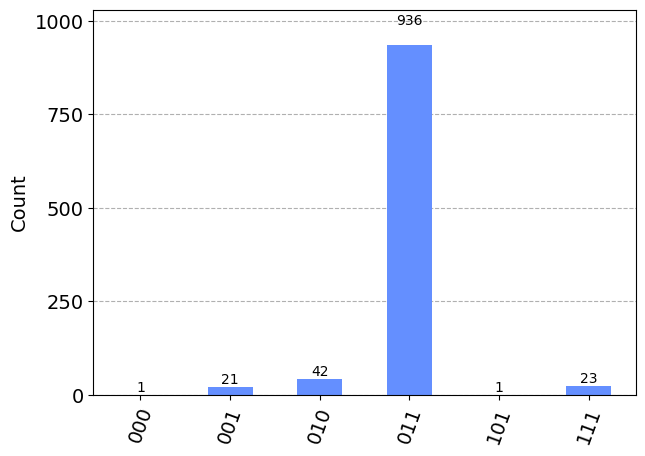

In [11]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

# creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpilamos el circuito para mapearlo a las puertas ruidosass
transpiled_circ = transpile(circuits=circuit,backend=device_backend)

# Ejecutamos el circuito y obtenemos el resultado
job = sim_vigo.run(transpiled_circ).result()

display(plot_histogram(job.get_counts()))

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Bersntein-Vazirani, para ello:

- Creamos el circuito cuántico, que llamamos <b>bv_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

Creado BV-oraculo con s 110


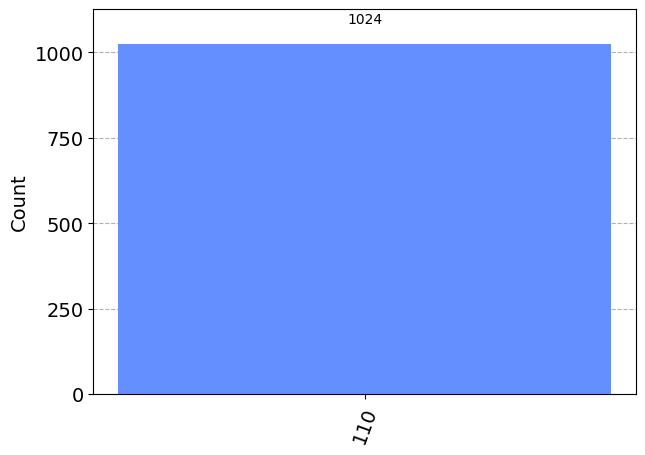

In [60]:
#Construimos el circuito
bv_circuit = QuantumCircuit(n+1,n)

bv_circuit.h(range(n))
bv_circuit.x(n)
bv_circuit.h(n)
bv_circuit.barrier()

bv_circuit.compose(bv_oracle(n),inplace=True)
bv_circuit.barrier()

bv_circuit.h(range(n))
bv_circuit.barrier()

bv_circuit.measure(range(n),range(n))

#ejecutamos en simulador para comprobar que esta ok
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=bv_circuit,backend=backend)
job = backend.run(transpiled_circ).result()
display(plot_histogram(job.get_counts()))

Lo que viene a continuación se hace basado en el circuito anterior generado aleatoriamente. Por eso, el resultado que aparecerá será $s = 110$. Si se vuelve a ejecutar el cuadernillo, recomendamos que la parte de simulación en backend real no vuelva a ser ejecutada.

In [13]:
# buscamos el backend menos ocupado con lest busy
from qiskit import Aer
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(simulator = False))
backend.name()

'ibm_brisbane'

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


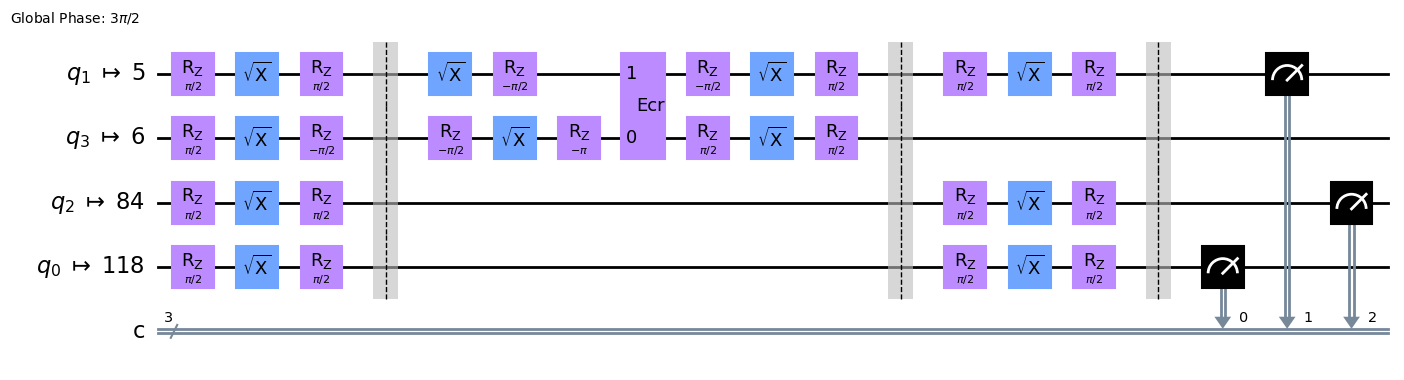

In [14]:
#lanzamos la ejecucion del job
transpiled_circuit = transpile(bv_circuit, backend=backend)
transpiled_circuit.draw("mpl",fold=-1,idle_wires=False)

Y cuando termine la ejecucion, consultaremos el resultado

In [57]:
#job = backend.run(transpiled_circuit) # No ejecutar de nuevo

Nuestro job_ID es: $\verb|cq9py4rcyn5g008nka50|$. Veamos el resultado.

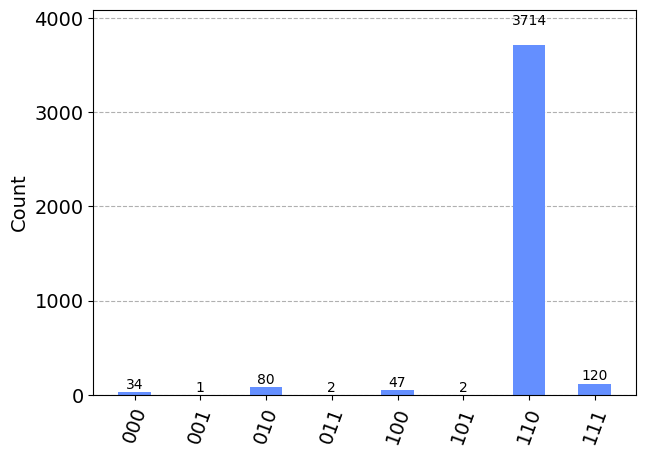

In [15]:
backend = provider.get_backend('ibm_brisbane')
job = backend.retrieve_job('cq9py4rcyn5g008nka50')

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Tal y como vemos, $s = 110$ en la mayoría de casos.